In [90]:
## Install required libraries
# pip install -r requirements.txt

## Import required libraries

In [91]:
%matplotlib inline
from nanovna import NanoVNA
#reload script
# %run nanovna.py

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time

## Connect to nano-VNA

Suggested: check if the nano-vna is connected:  \\\
Use the command: "ls /dev/tty.usb*" to check for conected devices. Might not show up as a VNA in the name of the device.

In [93]:
# create instance and connect to the device
nv = NanoVNA()

## Get screenshot of screen

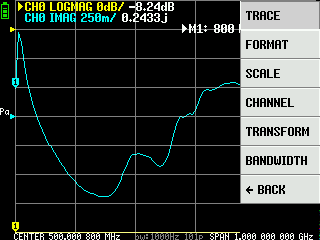

In [94]:
nv.capture()

## Data processing

### Set frequency range for sweep

In [7]:
start=250e3
stop=450e3

In [8]:
nv.set_sweep(start, stop)
nv.fetch_frequencies()

### Collect Data

In [1]:
iq_s11=nv.data(0)

NameError: name 'nv' is not defined

### Plot real and imaginary part of the data

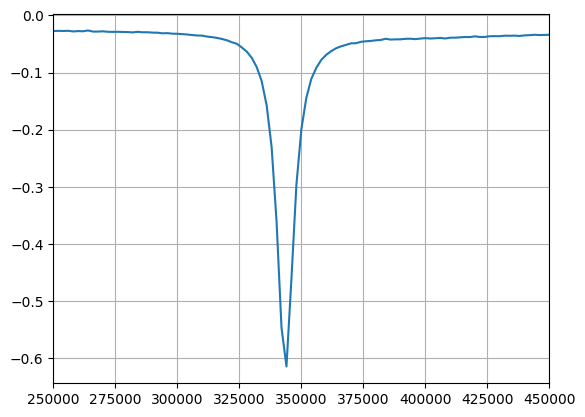

In [168]:
nv.logmag(iq_s11)

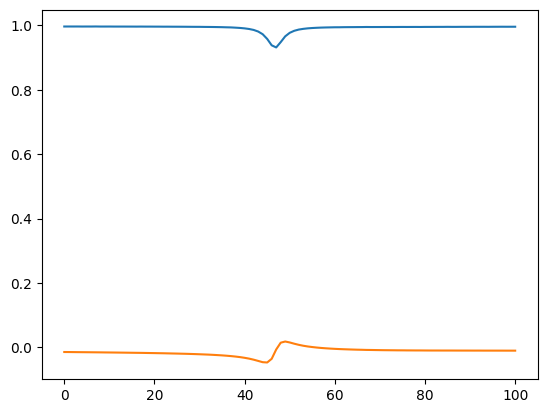

In [167]:
plt.plot(np.real(iq_s11))
plt.plot(np.imag(iq_s11))

### Saving/Loading Data

In [17]:
dict_data={
    'freq':nv.frequencies,
    'iq_s11':iq_s11
}

In [31]:
name='LC_osc_no_shield_2.pickle'
overwrite=True
if overwrite:
    with open(name, 'wb') as f:
        pickle.dump(dict_data,f)


In [32]:
try:
    with open(name, 'rb') as f:
        dict_data = pickle.load(f)
    print(dict_data.keys())
except FileNotFoundError:
    print(f"File {name} not found.")    

dict_keys(['freq', 'iq_s11'])


### Analysis:

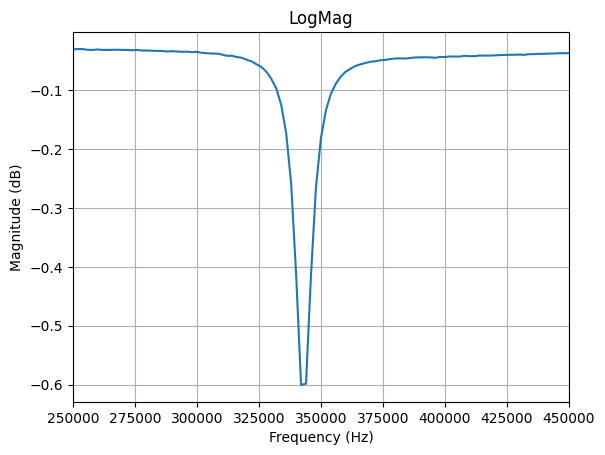

In [33]:
## LogMag plot
nv.logmag(iq_s11)
plt.title('LogMag')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.show()

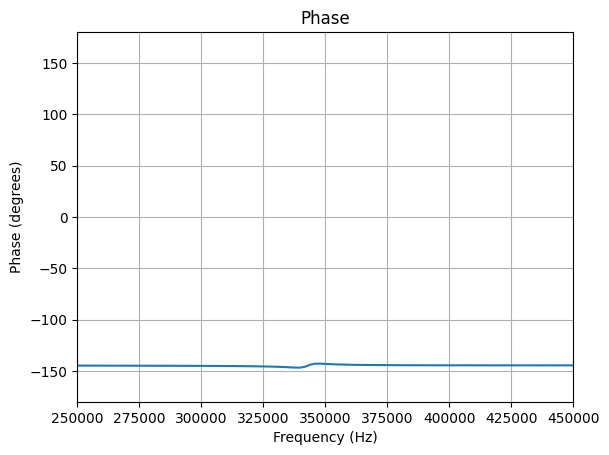

In [34]:
## Phase plot
nv.phase(iq_s11*np.exp(1j*np.pi*1.2))
plt.title('Phase')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (degrees)')
plt.show()

# Segmented data collection

In [111]:
start=1e3
stop=1e9

In [112]:
print(start,stop)

1000.0 1000000000.0


In [113]:
segments=np.linspace(start, stop, 11)
print(segments)

[1.000000e+03 1.000009e+08 2.000008e+08 3.000007e+08 4.000006e+08
 5.000005e+08 6.000004e+08 7.000003e+08 8.000002e+08 9.000001e+08
 1.000000e+09]


In [114]:
segments=np.linspace(start, stop, 11)
print(segments)
iq_list=np.zeros(0, dtype=np.complex128)
freq_list=np.zeros(0, dtype=np.float64)
for i in range(len(segments)-1):
    nv.set_sweep(segments[i], segments[i+1])
    time.sleep(2)
    nv.fetch_frequencies()
    iq_s11=nv.data(0)
    iq_list=np.concatenate((iq_list, iq_s11))
    freq_list=np.concatenate((freq_list, nv.frequencies))

[1.000000e+03 1.000009e+08 2.000008e+08 3.000007e+08 4.000006e+08
 5.000005e+08 6.000004e+08 7.000003e+08 8.000002e+08 9.000001e+08
 1.000000e+09]


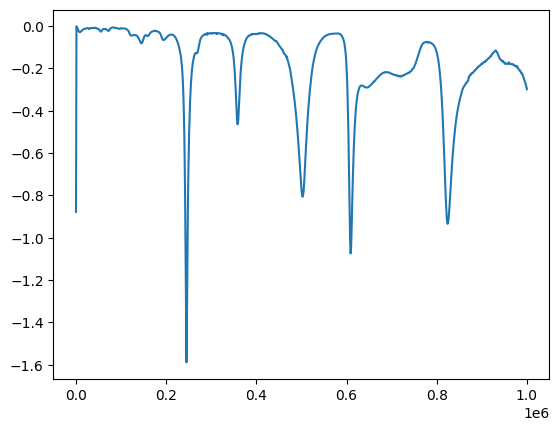

In [115]:
plt.plot(freq_list/1e3,np.log(np.abs(iq_list)))

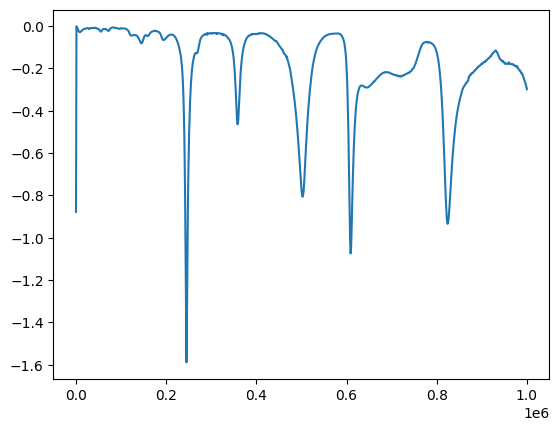

In [116]:
plt.plot(freq_list/1e3,np.log(np.abs(iq_list)))

In [38]:
np.argmin(np.abs(iq_list))

np.int64(685)

In [39]:
iq_list[685]=iq_list[684]

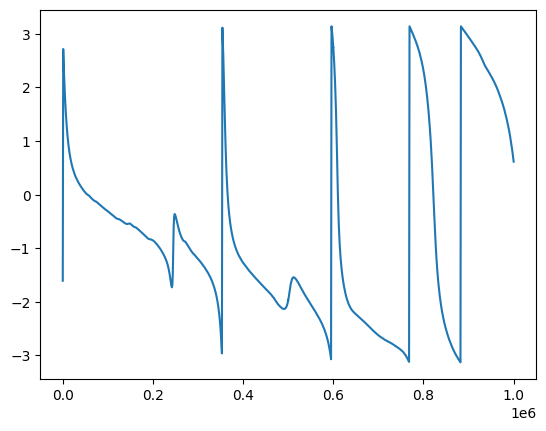

In [117]:
plt.plot(freq_list/1e3,np.angle(iq_list))

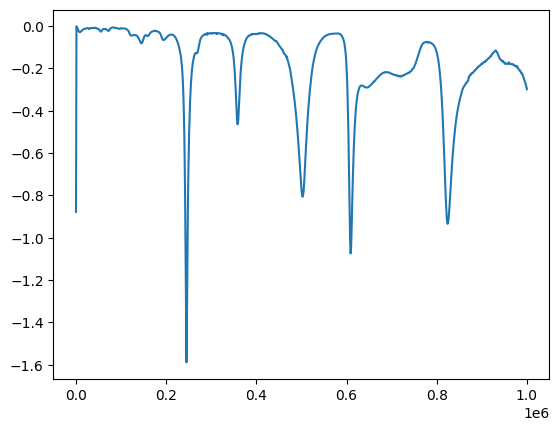

In [118]:
plt.plot(freq_list/1e3,np.log(np.abs(iq_list)))

In [103]:
folder_name='folder'

In [119]:
dict_data={
    'freq':freq_list,
    'iq_s11':iq_list
}

name=folder_name+'/3.pickle'
overwrite=True
if overwrite:
    with open(name, 'wb') as f:
        pickle.dump(dict_data,f)
